<a href="https://colab.research.google.com/github/Osama-Ashraf-1999/csv-datasets/blob/main/Osama_Ashraf_student_mental_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome!

### *Task:* **Student mental health analysis**
##### *Goal: Analyze the relationship between conditions of mental disorders, gender, age, year of study, marital status, and CGPA, etc.*
> *I tried to apply all the concepts learned in this course through this notebook.*

---
\
### *Name:* **Osama Ashraf AbdelSamee AlQureshi**

### *Specialisation:* **M.Sc in Control System Engineering --- basic**

### *Subject:* **Advanced Programming --- 2024 winter / second term**

### *Prof. Dr:* **Nermin Gamal**

### **Kafrelsheik University**
---

# Code Implementation

In [2]:
# importing essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder


In [3]:
# reading the dataset from a csv file uploaded on my Github (with public access)
dataset = pd.read_csv('https://raw.githubusercontent.com/Osama-Ashraf-1999/csv-datasets/21e77474ecb971acced06edf2f7a57bca96efe12/Student%20Mental%20health.csv')

# showing info or meta-data
dataset.info()

# previewing the dataframe
dataset.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
5,8/7/2020 12:31,Male,19.0,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,No
6,8/7/2020 12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,8/7/2020 12:33,Female,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
8,8/7/2020 12:35,Female,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No
9,8/7/2020 12:39,Male,18.0,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No


In [4]:
# data cleaning

dataset['Age'].fillna(dataset['Age'].mean(), inplace = True)

# dropping unneeded features
dataset = dataset.drop("Timestamp", axis=1)

# renaming columns
dataset = dataset.rename(columns={"Choose your gender":"gender",\
                                  "Age":"age",\
                                  "What is your course?":"course",\
                                  "Your current year of Study":"year",\
                                  "What is your CGPA?":"CGPA",\
                                  "Marital status":"Married",\
                                  "Do you have Depression?":"depressed",\
                                  "Do you have Anxiety?":"anxiety",\
                                  "Do you have Panic attack?":"panic",\
                                  "Did you seek any specialist for a treatment?":"treatment"})

# showing data after cleaning
dataset.info()
dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     101 non-null    object 
 1   age        101 non-null    float64
 2   course     101 non-null    object 
 3   year       101 non-null    object 
 4   CGPA       101 non-null    object 
 5   Married    101 non-null    object 
 6   depressed  101 non-null    object 
 7   anxiety    101 non-null    object 
 8   panic      101 non-null    object 
 9   treatment  101 non-null    object 
dtypes: float64(1), object(9)
memory usage: 8.0+ KB


,gender,age,course,year,CGPA,Married,depressed,anxiety,panic,treatment
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
5,Male,19.0,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,No
6,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,Female,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
8,Female,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No
9,Male,18.0,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No


In [5]:
###############################
#  encoding categorical data  #
###############################
#
#
# dealing with the 'CGPA' feature column
# first, removing leading and trailing whitespaces in the 'CGPA' column
dataset['CGPA'] = dataset['CGPA'].str.strip()

def convert_cgpa_range(cgpa_range):
    # Split the range into two values
    cgpa_values = cgpa_range.split('-')
    # Calculate the midpoint
    midpoint = ((float(cgpa_values[0]) + float(cgpa_values[1])) / 2)
    return midpoint

# applying the function to the 'CGPA' column
dataset['CGPA'] = dataset['CGPA'].apply(convert_cgpa_range)

# checking the unique values in the 'CGPA' column after conversion
print(dataset['CGPA'].unique())
#
#
#

[3.245 3.75  2.745 2.245 0.995]


In [6]:
# standardizing the 'year of Study' column values and converting to numeric
dataset['year'] = dataset['year'].str.lower().str.replace('year', '').str.strip().map({'1': 1, '2': 2, '3': 3, '4': 4})

# Check the unique values in the 'year of Study' column after conversion
print(dataset['year'].unique())
#
#
#

[1 2 3 4]


In [7]:
# Binary Encoding for Yes/No Columns (label encoder)
binary_columns = ['Married','depressed', 'anxiety', 'panic', 'treatment']
dataset[binary_columns] = dataset[binary_columns].replace({'Yes': 1, 'No': 0})
#
#
#

In [8]:
# encoding 'gender' column

dataset['gender'] = dataset['gender'].map({'Female': 0, 'Male': 1})

In [9]:
# dealing with the 'course' column
###################################
#
# first, recognizing the unique values
dataset['course'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [10]:
course_mapping = {
    'engineering': 'Engineering',
    'islamic education': 'Islamic Education',
    'bit': 'BIT',
    'laws': 'Law',
    'mathemathics': 'Mathematics',
    'pendidikan islam': 'Islamic Education',
    'bcs': 'BCS',
    'human resources': 'Human Resources',
    'irkhs': 'IRKHS',
    'psychology': 'Psychology',
    'kenms': 'KENMS',
    'accounting': 'Accounting',
    'enm': 'ENM',
    'marine science': 'Marine Science',
    'koe': 'KOE',
    'banking studies': 'Banking Studies',
    'business administration': 'Business Administration',
    'kirkhs': 'KIRKHS',
    'usuluddin': 'Usuluddin',
    'taasl': 'TAASL',
    'engine': 'Engineering',
    'ala': 'ALA',
    'biomedical science': 'Biomedical Science',
    'benl': 'BENL',
    'it': 'IT',
    'cts': 'CTS',
    'econs': 'Economics',
    'mhsc': 'MHSC',
    'malcom': 'MALCOM',
    'kop': 'KOP',
    'human sciences': 'Human Sciences',
    'biotechnology': 'Biotechnology',
    'communication': 'Communication',
    'diploma nursing': 'Diploma Nursing',
    'pendidikan islam': 'Islamic Education',
    'radiography': 'Radiography',
    'fiqh fatwa': 'Fiqh Fatwa',
    'diploma tesl': 'Diploma TESL',
    'fiqh': 'Fiqh',
    'nursing': 'Nursing',
}

#since multiple entries of the same courses exist
#yet only differ in lettercase
dataset['course'] = dataset['course'].str.lower().str.strip().map(course_mapping)
dataset.course.unique()

array(['Engineering', 'Islamic Education', 'BIT', 'Law', 'Mathematics',
       'BCS', 'Human Resources', 'IRKHS', 'Psychology', 'KENMS',
       'Accounting', 'ENM', 'Marine Science', 'KOE', 'Banking Studies',
       'Business Administration', nan, 'KIRKHS', 'Usuluddin', 'TAASL',
       'ALA', 'Biomedical Science', 'BENL', 'IT', 'CTS', 'Economics',
       'MHSC', 'MALCOM', 'KOP', 'Human Sciences', 'Biotechnology',
       'Communication', 'Diploma Nursing', 'Radiography', 'Fiqh Fatwa',
       'Diploma TESL', 'Fiqh', 'Nursing'], dtype=object)

In [11]:
# utilizing sklearn label encoder module on the 'course' column

label_encoder = LabelEncoder()

# Apply label encoding to the 'Course' column
dataset['course'] = label_encoder.fit_transform(dataset['course'])

In [12]:
# now we display the dataframe after encoding all cotegorical features
dataset.info()
dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     101 non-null    int64  
 1   age        101 non-null    float64
 2   course     101 non-null    int64  
 3   year       101 non-null    int64  
 4   CGPA       101 non-null    float64
 5   Married    101 non-null    int64  
 6   depressed  101 non-null    int64  
 7   anxiety    101 non-null    int64  
 8   panic      101 non-null    int64  
 9   treatment  101 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 8.0 KB


,gender,age,course,year,CGPA,Married,depressed,anxiety,panic,treatment
0,0,18.0,15,1,3.245,0,1,0,1,0
1,1,21.0,22,2,3.245,0,0,1,0,0
2,1,19.0,4,1,3.245,0,1,1,1,0
3,0,22.0,27,3,3.245,1,1,0,0,0
4,1,23.0,31,4,3.245,0,0,0,0,0
5,1,19.0,15,2,3.750,0,0,0,1,0
6,0,23.0,22,2,3.750,1,1,0,1,0
7,0,18.0,2,1,3.750,0,0,1,0,0
8,0,19.0,18,2,2.745,0,0,0,0,0
9,1,18.0,20,1,3.750,0,0,1,1,0


# Data Visualization and Analysis

##First, high view on key features in data

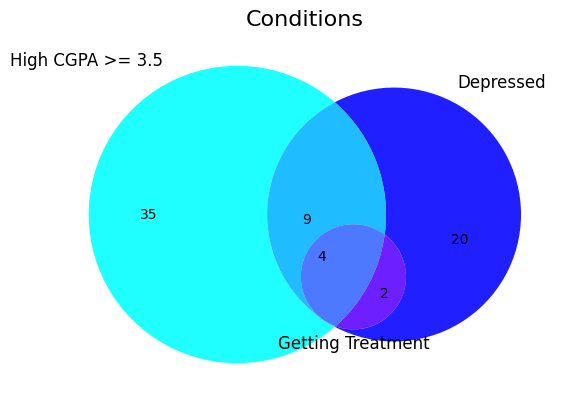

In [45]:
high_CGPA = dataset[(dataset["CGPA"] >= 3.5)]
depressed = dataset[(dataset["depressed"] == 1)]
being_treated = dataset[(dataset["treatment"] == 1)]

venn3(subsets = [set(high_CGPA.index),
                 set(depressed.index),
                 set(being_treated.index)],
      set_labels = ("High CGPA >= 3.5", "Depressed", "Getting Treatment"),
      set_colors = ("Cyan", "Blue", "Purple"),
      alpha = 0.878)

plt.title("Conditions", fontsize = 16)
plt.show()

##All Data distribution

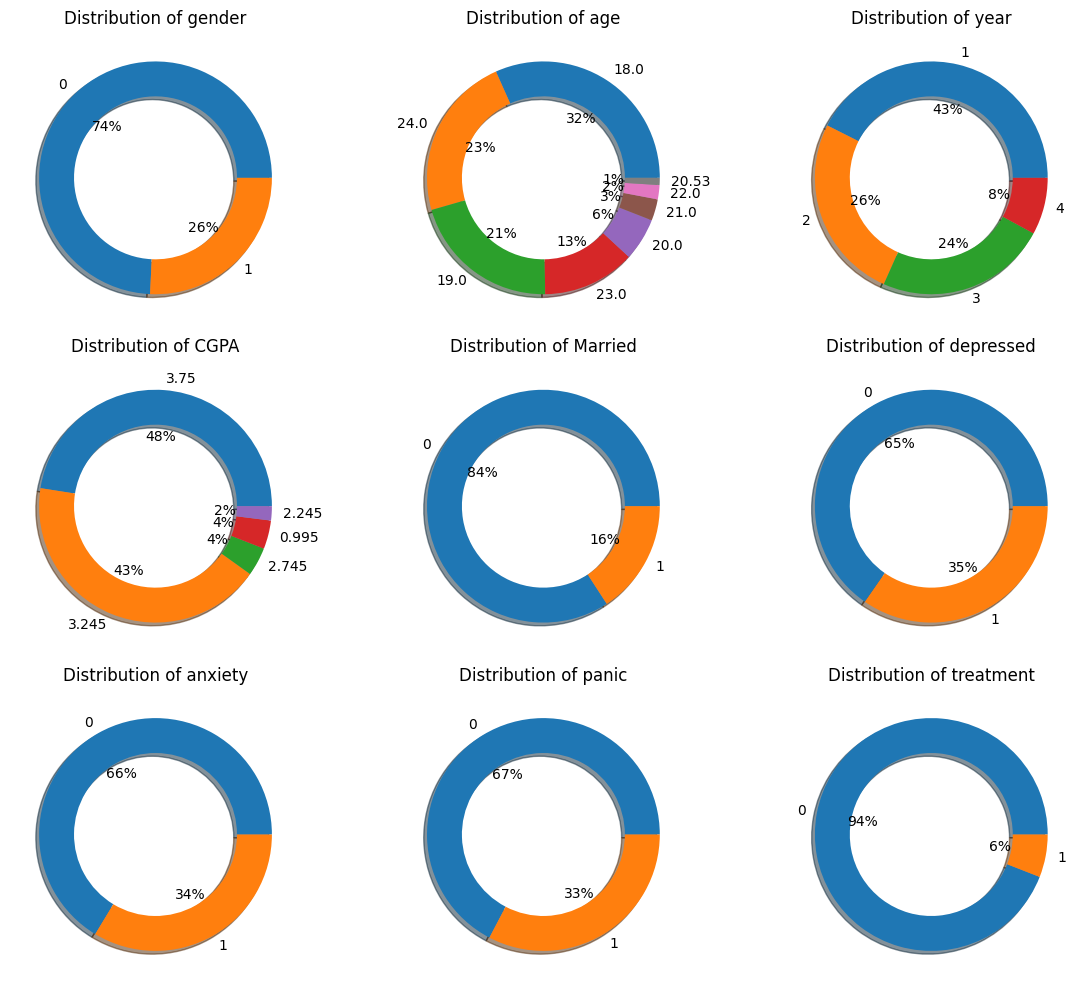

In [24]:
# Visualizing data distribution

columns_of_interest = ['gender', 'age', 'year', 'CGPA', 'Married', 'depressed', 'anxiety', 'panic', 'treatment']

# Creating a new figure and axes for the subplots
num_rows = 3
num_cols = (len(columns_of_interest) + num_rows - 1) // num_rows


fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Flattennig the axes array to simplify indexing
axs = axs.flatten()

for i, column in enumerate(columns_of_interest):
    # Pie chart
    data_pie = dataset[column].value_counts()
    axs[i].pie(data_pie, labels=data_pie.index, autopct='%.0f%%', shadow=True, wedgeprops={"width": 0.3})
    axs[i].set_title(f'Distribution of {column}')

# Adjusting layout
plt.tight_layout()
plt.show()

##Pairwise analogy between features

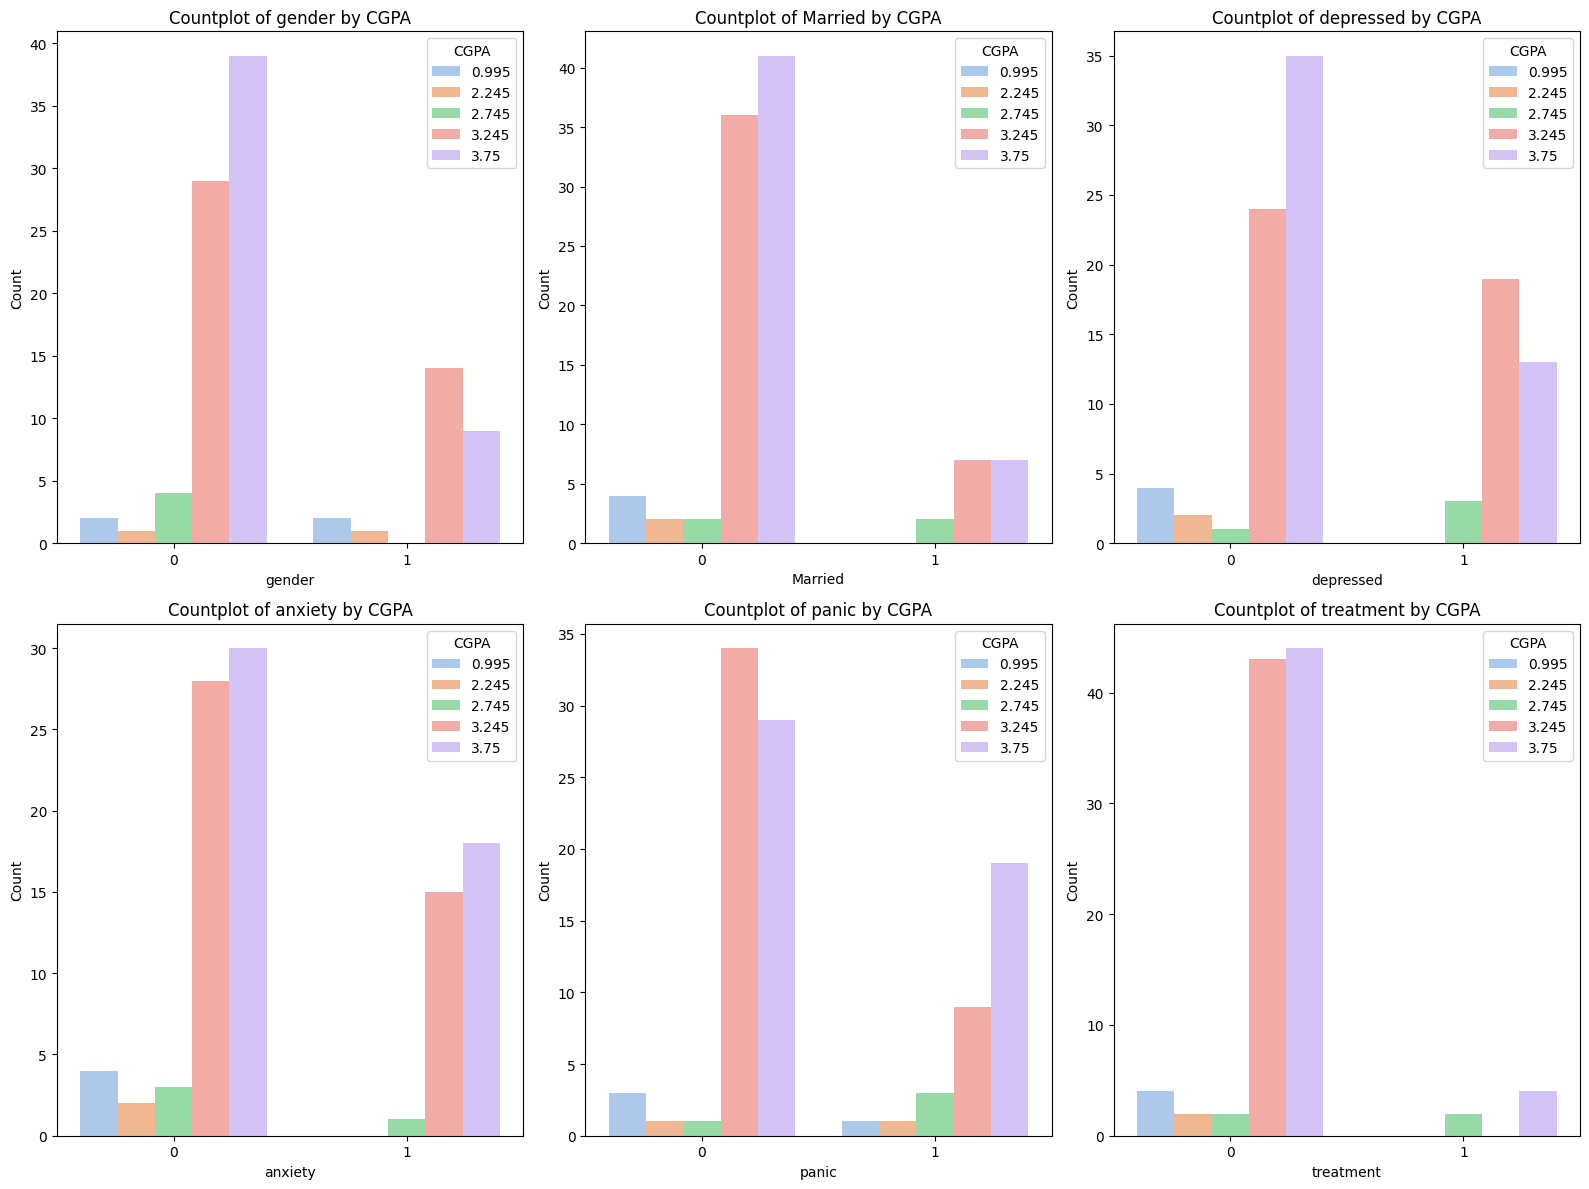

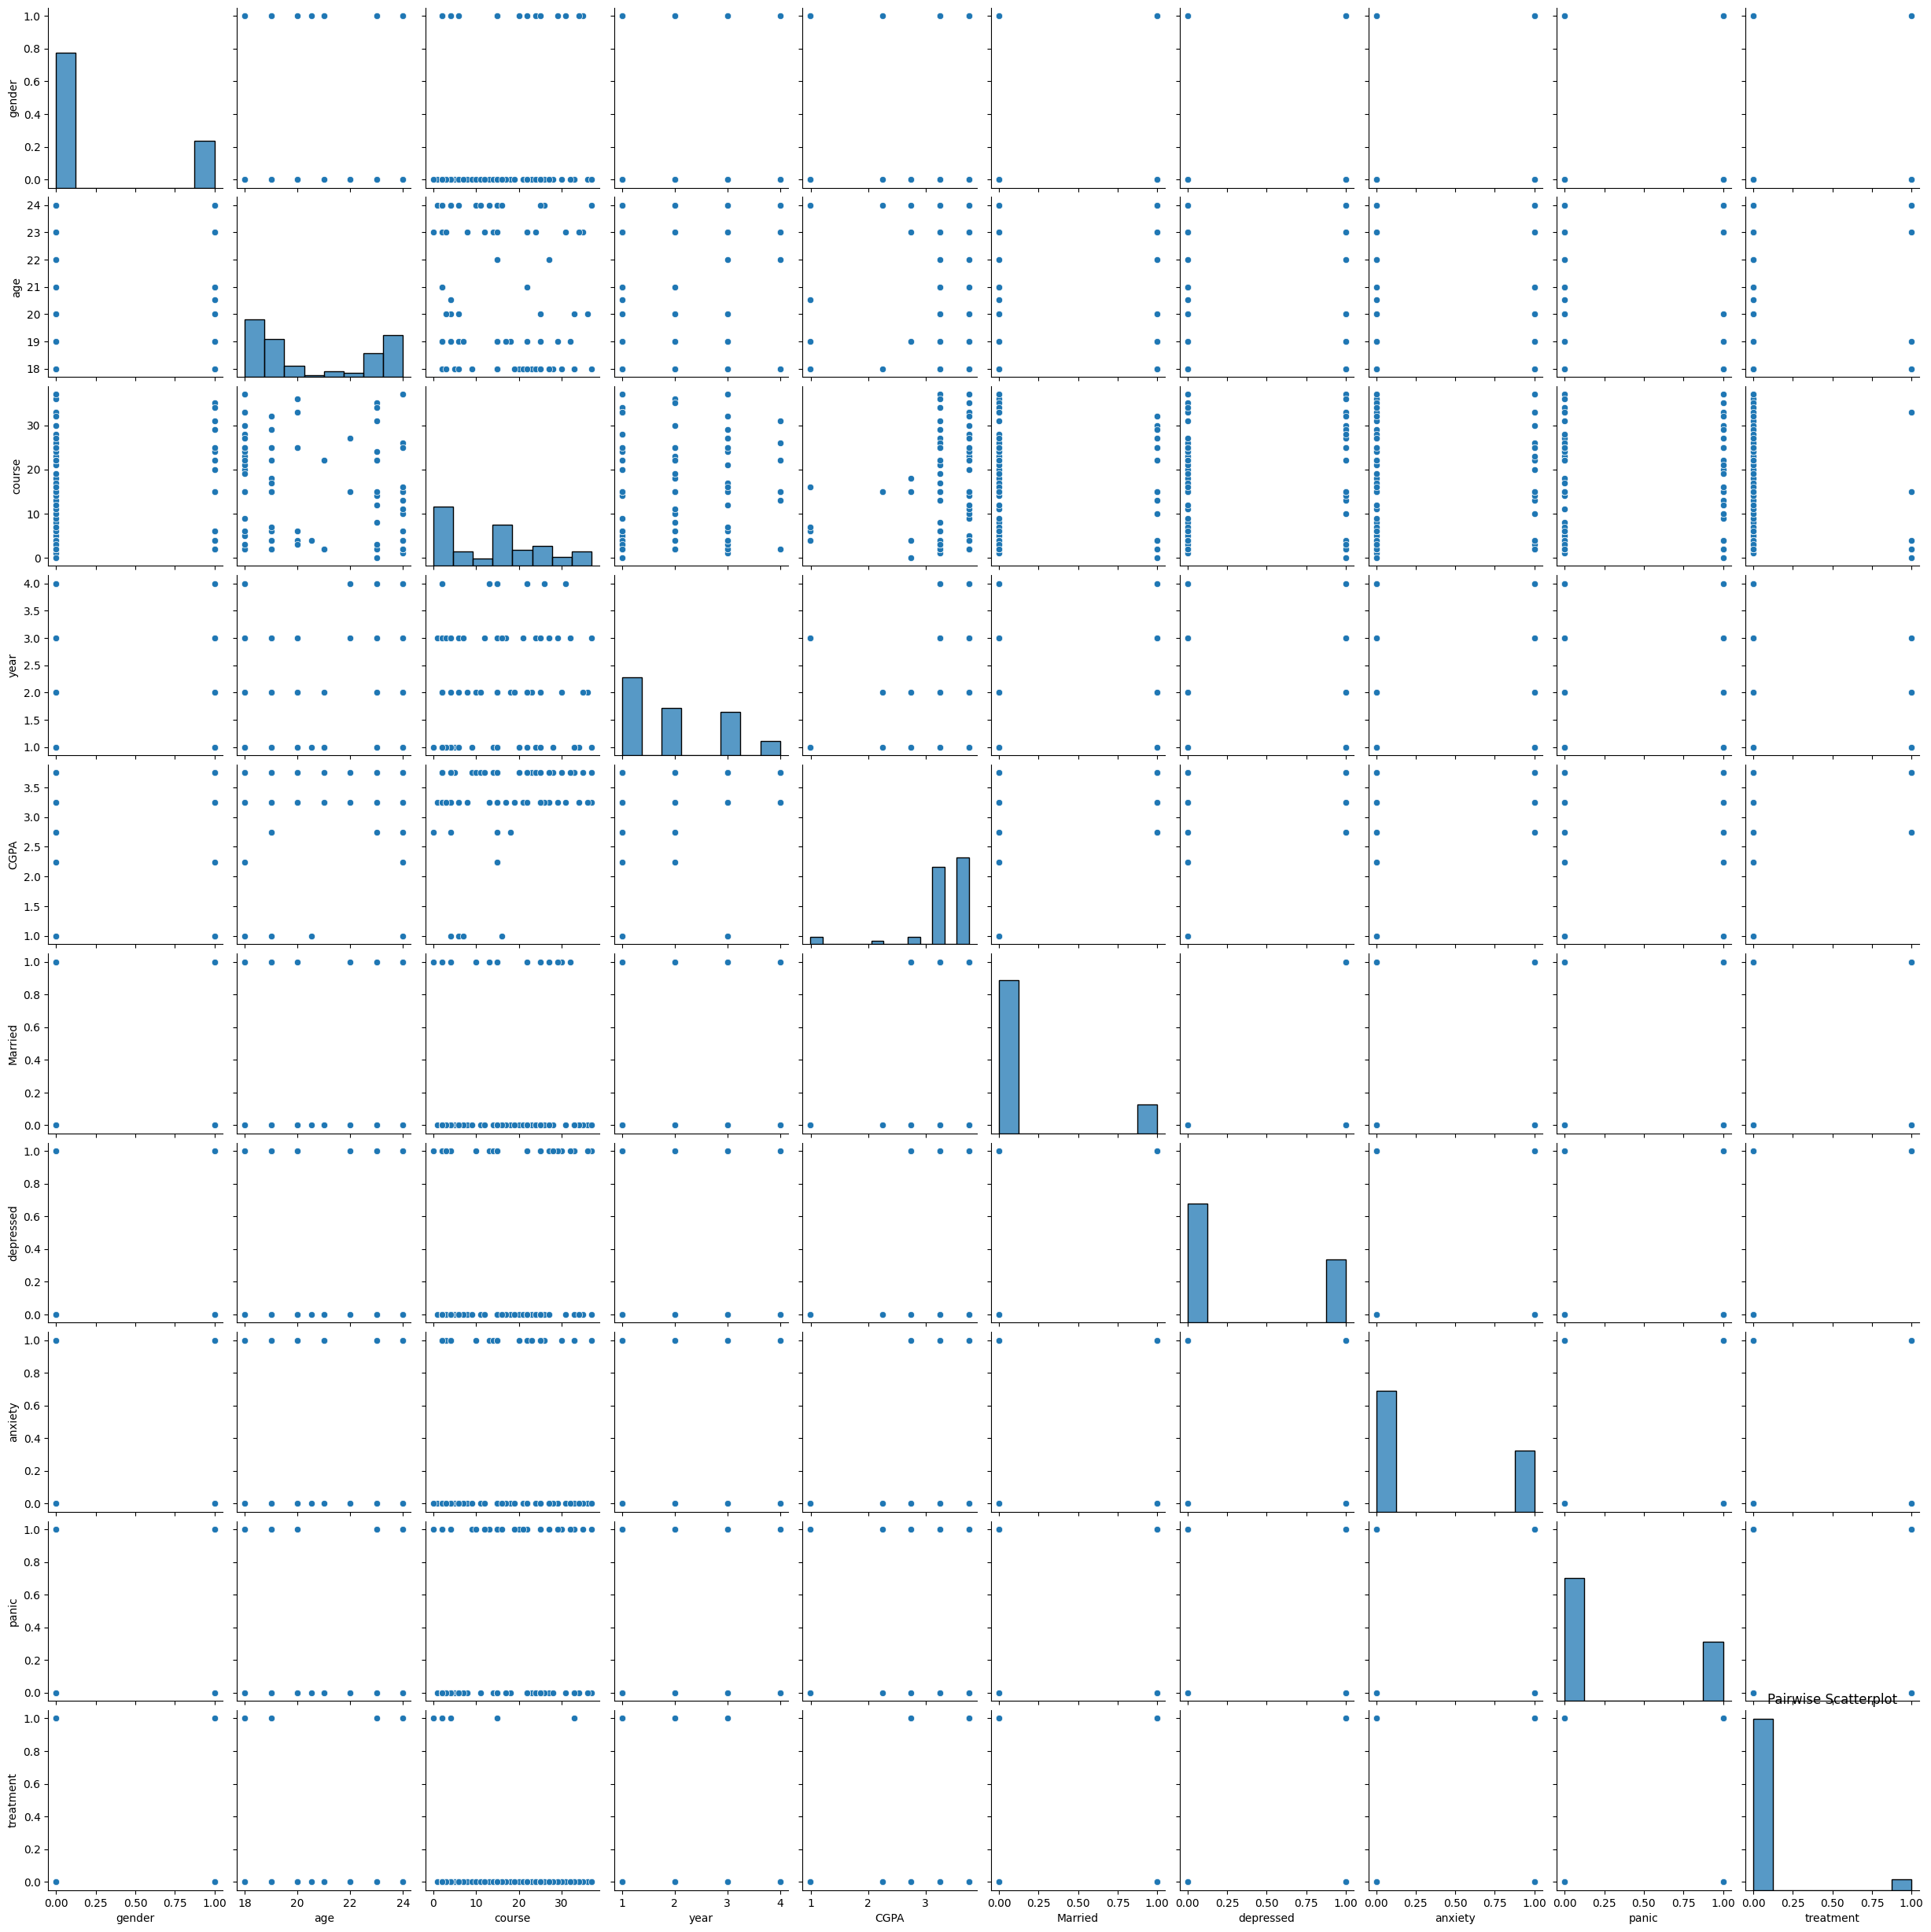

In [35]:
column_of_interest = ['gender', 'Married', 'depressed', 'anxiety', 'panic', 'treatment']

# Define the number of rows and columns for the subplot grid
num_rows = 2
num_cols = (len(column_of_interest) + num_rows - 1) // num_rows

# Create a new figure and axes for the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 12))

# Flatten the axes array to simplify indexing
axs = axs.flatten()

for i, column in enumerate(column_of_interest):
    # Countplot
    sns.countplot(data=dataset, x=column, hue="CGPA", palette='pastel', ax=axs[i])
    axs[i].set_title(f'Countplot of {column} by CGPA')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


# Pairwise scatterplot for numerical features (after converting categorical features into numerical)
sns.pairplot(dataset)
plt.title('Pairwise Scatterplot')
plt.show()

##Visualizing the degree of correlation among features

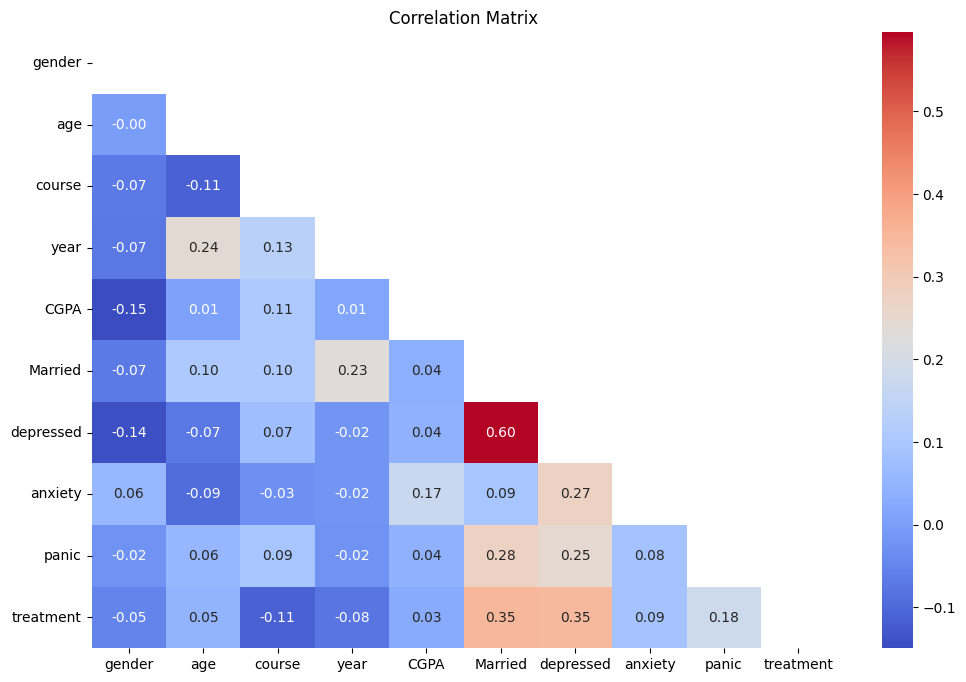

In [15]:

# exploring correlations among different features and visualizing them via heatmap
correlation_matrix = dataset.corr()
corr_mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, mask=corr_mask, annot=True, cmap='coolwarm', fmt='0.2f')
plt.title('Correlation Matrix')
plt.show()


# Machine Learning Application

In [75]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [76]:
# Change hyperparameters to increase accuracy
param_grid = {
    'n_estimators': [50],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [5]
}

## Setting our target and configuring Random Forest model

In [77]:
X = dataset.drop(['depressed'], axis=1)
y = dataset['depressed']

In [78]:
# Selecting machine learning model
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

In [79]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using Grid Search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10], 'min_samples_leaf': [5],
                         'min_samples_split': [2], 'n_estimators': [50]},
             scoring='accuracy')

In [80]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50}


In [81]:
# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [82]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

In [84]:
#Print our results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.57
